<a href="https://colab.research.google.com/github/EisaacJC/Ciencia-de-Datos-Personal/blob/master/Descensoxelgrad_examen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Facultad de Física UV

<img align="left" style="padding-right:10px;" src="https://www.uv.mx/ffia/files/2012/09/playerLogo2.jpg">



Descripción del problema matemático, consideremos una función costo, con el objetivo de encontrar los extremos de ésta función derivamos parcialmente respecto a las componentes de la función, haciendo uso de la hipótesis lineal


<b>Función Costo</b>
\begin{equation}
J(\theta) = 1/2m \sum_{i=1}^{m} (h(\theta)^{(i)} - y^{(i)})^2 
\end{equation}

<b>Derivada de la función costo con respecto de las variables $\theta_i$ </b>

\begin{equation}
\frac{\partial J(\theta)}{\partial \theta_j} = 1/m\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_j^{(i)}
\end{equation}

<b>Expresión numérica para cada "gradiente" </b>
\begin{equation}
\theta_0: = \theta_0 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}
\begin{equation}
\theta_1: = \theta_1 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_1^{(i)})
\end{equation}
\begin{equation}
\theta_2: = \theta_2 -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_2^{(i)})
\end{equation}

\begin{equation}
\theta_j: = \theta_j -\alpha . (1/m .\sum_{i=1}^{m}(h(\theta^{(i)} - y^{(i)}).X_0^{(i)})
\end{equation}

# Importación de librerías y lectura de bases de datos

In [0]:
#importando librerias
#!pip install pandas
#!pip install pandas.compat
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
#from pandas.compat import StringIO
%matplotlib inline

In [0]:
#Adqusición de datos:
#datos entrenamiento
#dent=pd.read_csv("https://raw.githubusercontent.com/EisaacJC/DCI/master/datosEntrenamiento.csv?token=ACRPZCPCCRSVX2HGD4RH5RC56FTNS",names=["x0","x1","x2","x3","y"], delim_whitespace= False, header= None)
#datos prueba
#dprp=pd.read_csv("https://raw.githubusercontent.com/EisaacJC/DCI/master/datosPrueba.csv?token=ACRPZCPZQCVZLPD6IQ2VFKK56FTXQ",names=["x0","x1","x2","x3","y"], delim_whitespace= False, header= None)
#datos validacion
#dval=pd.read_csv("https://raw.githubusercontent.com/EisaacJC/DCI/master/datosPrueba.csv?token=ACRPZCMUNUK5L33AHNILABC56FUBQ",names=["x0","x1","x2","x3","y"], delim_whitespace= False, header= None)
dent=pd.read_csv("https://raw.githubusercontent.com/EisaacJC/Ciencia-de-Datos-Personal/master/energydata_complete.csv", delim_whitespace= False) #header= None)

#dent=pd.read_csv("https://raw.githubusercontent.com/EisaacJC/Ciencia-de-Datos-Personal/master/data.csv",names=["x0","x1","x2"])

In [3]:
dent

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,55.200000,7.026667,84.256667,17.200000,41.626667,18.2000,48.900000,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,55.200000,6.833333,84.063333,17.200000,41.560000,18.2000,48.863333,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,55.090000,6.560000,83.156667,17.200000,41.433333,18.2000,48.730000,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,55.090000,6.433333,83.423333,17.133333,41.290000,18.1000,48.590000,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,55.090000,6.366667,84.893333,17.200000,41.230000,18.1000,48.590000,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,52.400000,24.796667,1.000000,24.500000,44.500000,24.7000,50.074000,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,52.326667,24.196667,1.000000,24.557143,44.414286,24.7000,49.790000,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,52.266667,23.626667,1.000000,24.540000,44.400000,24.7000,49.660000,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,52.200000,22.433333,1.000000,24.500000,44.295714,24.6625,49.518750,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [0]:
 del dent["rv1"]
 del dent["rv2"]
 del dent["date"]
 del dent["lights"]

In [5]:
dent.info

<bound method DataFrame.info of        Appliances         T1       RH_1  ...  Windspeed  Visibility  Tdewpoint
0              60  19.890000  47.596667  ...   7.000000   63.000000   5.300000
1              60  19.890000  46.693333  ...   6.666667   59.166667   5.200000
2              50  19.890000  46.300000  ...   6.333333   55.333333   5.100000
3              50  19.890000  46.066667  ...   6.000000   51.500000   5.000000
4              60  19.890000  46.333333  ...   5.666667   47.666667   4.900000
...           ...        ...        ...  ...        ...         ...        ...
19730         100  25.566667  46.560000  ...   3.333333   23.666667  13.333333
19731          90  25.500000  46.500000  ...   3.500000   24.500000  13.300000
19732         270  25.500000  46.596667  ...   3.666667   25.333333  13.266667
19733         420  25.500000  46.990000  ...   3.833333   26.166667  13.233333
19734         430  25.500000  46.600000  ...   4.000000   27.000000  13.200000

[19735 rows x 25 co

# Visualización de la base de datos, para ver posibles correlaciones

In [0]:
#sns.pairplot(data=dent);

# Definición de funciones:


In [0]:
#Costo
def calcula_costo(X,y,theta):
    sumax = np.power(((X @ theta.T)-y),2)
    return np.sum(sumax)/(2 * len(X))


In [0]:
#Descenso
def descenso(X,y,theta,iters,alpha):
    costo = np.zeros(iters)
    T=np.zeros(iters)
    A=[T, costo]
    for i in range(iters):
        theta = theta - (alpha/len(X)) * np.sum(X * (X @ theta.T - y), axis=0)
        costo[i] = calcula_costo(X, y, theta)
        #T[i]=T[i]+1
        #plt.scatter(i, costo[i])
    #plt.scatter(T,calcula_costo)
    return theta,costo


# Entrenamiento

In [0]:
#dent = (dent - dent.mean())/dent.std()
#a=dent.std()
dent.head()
#Creando las matrices de datos
X = dent.iloc[0:,1:25]
ones = np.ones([X.shape[0],1])
X = np.concatenate((ones,X),axis=1)# Concatenando las primeras cuatro columnas
#en nuestra matriz
y = dent.iloc[:,0:1].values #Poniendo la quinta en Y
theta = np.zeros([1,25])#Generando el vector de thetas
#Ajustando parámetros
alpha = 0.0000000001
iters = 100000

In [37]:
#Ejecutando el descenso por el gradiente y la función costo
g,costo = descenso(X,y,theta,iters,alpha)
print(g)
costo_final = calcula_costo(X,y,g)

[[0.00016349 0.00364048 0.00693202 0.00360033 0.00635201 0.00382046
  0.00653268 0.00349836 0.00645164 0.00324471 0.00838541 0.00204329
  0.00618182 0.00337478 0.00548945 0.00368641 0.00650805 0.00321193
  0.00656842 0.00176507 0.12320651 0.01067248 0.00088303 0.00625543
  0.000685  ]]


Text(0.5, 1.0, 'Función Costo')

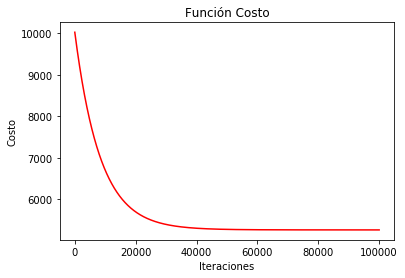

In [38]:
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), costo, 'r')  
ax.set_xlabel('Iteraciones')  
ax.set_ylabel('Costo')  
ax.set_title('Función Costo')  

# Elección "aleatoria" de los datos

[[-0.00384713 -0.02920328  0.31341732  0.0520351  -0.10761063  0.28168137
   0.14400556 -0.04450089  0.02681244 -0.07848576  0.0181754   0.08683773
   0.02725566 -0.05272884 -0.12075046  0.07659089 -0.24062135 -0.16360176
  -0.09983294 -0.03386384  0.00275548 -0.02105916  0.04715022  0.01999746
  -0.02635387]]
0.4248256025517623


Text(0.5, 1.0, 'Costo entrenamiento')

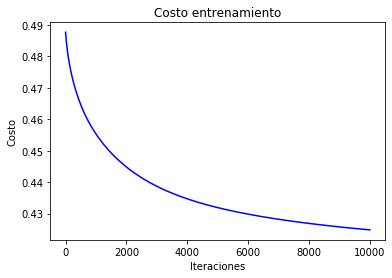

In [53]:
from sklearn.model_selection import train_test_split
data=dent
data = (data - data.mean())/data.std()
train, test = train_test_split(data, random_state = 0)
#dprb.head()
#Creando las matrices de dat0s
Xt = train.iloc[:,1:25]
ones = np.ones([Xt.shape[0],1])
Xt = np.concatenate((ones,Xt),axis=1)# Concatenando las primeras cuatro columnas
#en nuestra matriz
yt = train.iloc[:,0:1].values #Ponienndo la quinta en Y
theta = np.zeros([1,25])#Generando el vector de thetas
#Ejecutando el descenso por el gradiente y la función costo
alpha=0.001
iters=10000
g,costo = descenso(Xt,yt,theta,iters,alpha)
print(g)
costo_final = calcula_costo(Xt,yt,g)
print(costo_final)
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), costo, 'b')  
ax.set_xlabel('Iteraciones')  
ax.set_ylabel('Costo')  
ax.set_title('Costo entrenamiento')

# Prueba

[[ 0.01112142 -0.07121432  0.32009357  0.01130052 -0.11712417  0.24918999
   0.13555873  0.02096019  0.05070255 -0.10574538  0.02348241  0.09824815
   0.03155246 -0.05953968 -0.15824808  0.10568165 -0.18149353 -0.1409753
  -0.08947902 -0.03335581 -0.02026257 -0.04733918  0.05354779  0.01236718
  -0.04755091]]
0.4760929660926588


Text(0.5, 1.0, 'Costo entrenamiento')

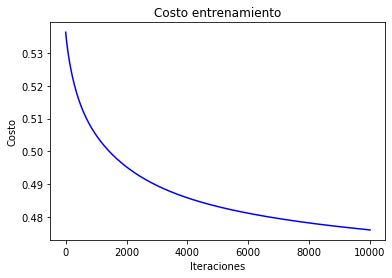

In [54]:
Xp = test.iloc[:,1:25]
ones = np.ones([Xp.shape[0],1])
Xp = np.concatenate((ones,Xp),axis=1)# Concatenando las primeras cuatro columnas
#en nuestra matriz
yp = test.iloc[:,0:1].values #Ponienndo la quinta en Y
theta = np.zeros([1,25])#Generando el vector de thetas
#Ejecutando el descenso por el gradiente y la función costo
alpha=0.001
iters=10000
g,costo = descenso(Xp,yp,theta,iters,alpha)
print(g)
costo_final = calcula_costo(Xp,yp,g)
print(costo_final)
fig, ax = plt.subplots()  
ax.plot(np.arange(iters), costo, 'b')  
ax.set_xlabel('Iteraciones')  
ax.set_ylabel('Costo')  
ax.set_title('Costo entrenamiento')

# Error



# OLS

In [55]:
from statsmodels.formula.api import ols
model = ols(" Appliances ~ T1 +RH_1+T2+RH_2+T3+RH_3+T4+RH_4+T5+RH_5+T6+RH_6+T7+RH_7+T8+RH_8+T9+RH_9+T_out+Press_mm_hg+RH_out + Windspeed + Visibility+Tdewpoint", dent).fit()
print(model.summary())
theta_ols = np.array(model.params)
theta_ols

                            OLS Regression Results                            
Dep. Variable:             Appliances   R-squared:                       0.146
Model:                            OLS   Adj. R-squared:                  0.145
Method:                 Least Squares   F-statistic:                     140.9
Date:                Thu, 05 Dec 2019   Prob (F-statistic):               0.00
Time:                        17:31:34   Log-Likelihood:                -26440.
No. Observations:               19735   AIC:                         5.293e+04
Df Residuals:                   19710   BIC:                         5.313e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -1.047e-14      0.007  -1.59e-12      

array([-1.04743146e-14,  6.06874856e-03,  6.23634587e-01, -4.34261184e-01,
       -5.72042396e-01,  4.96577718e-01,  1.60246850e-01,  5.92922748e-02,
        8.24434742e-02, -1.99417403e-04,  2.10381152e-02,  4.55130934e-01,
        1.05475366e-01,  2.32669759e-02, -9.19410903e-02,  1.93732474e-01,
       -3.00976967e-01, -4.34444712e-01, -6.07408159e-02, -5.52115115e-01,
        8.87947549e-03, -1.32555437e-01,  5.09081538e-02,  2.02701790e-02,
        2.07899834e-01])